In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../data/nyc_311_2024_noise.csv')
df.head(2)

/tmp/ipykernel_4874/3240605175.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/nyc_311_2024_noise.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,63579123,12/31/2024 11:52:57 PM,12/31/2024 11:58:53 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10031.0,1635 AMSTERDAM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.822593,-73.949525,"(40.822592971648255, -73.94952504515548)"
1,63574348,12/31/2024 11:52:03 PM,12/31/2024 11:59:18 PM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10013.0,21 VARICK STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.720222,-74.006743,"(40.72022232343317, -74.00674250402294)"


In [34]:
df["Complaint Type"].unique()


array(['Noise - Commercial', 'Noise - Residential', 'Noise - Park',
       'Noise - Street/Sidewalk', 'Noise - House of Worship',
       'Noise - Vehicle', 'Noise', 'Noise - Helicopter'], dtype=object)

In [35]:
df["Descriptor"].unique()

array(['Loud Music/Party', 'Loud Talking', 'Banging/Pounding',
       'Loud Television', 'Car/Truck Horn', 'Engine Idling',
       'Car/Truck Music', 'Noise: Construction Before/After Hours (NM1)',
       'Noise: Alarms (NR3)', 'Noise: Jack Hammering (NC2)',
       'Noise: Construction Equipment (NC1)',
       'Noise: Private Carting Noise (NQ1)',
       'Noise:  lawn care equipment (NCL)',
       'Noise: Boat(Engine,Music,Etc) (NR10)', 'In Public',
       'Noise: air condition/ventilation equipment (NV1)',
       'Noise: Manufacturing Noise (NK1)',
       'Noise: Other Noise Sources (Use Comments) (NZZ)',
       'Partial Access', 'Use Outside', 'Other', 'NYPD', 'News Gathering',
       'Other (complaint details)', 'Double Parked Blocking Vehicle',
       'Noise: Vehicle (NR2)', 'No Access'], dtype=object)

In [36]:
complaint_counts = df["Complaint Type"].value_counts()
complaint_counts

Complaint Type
Noise - Residential         377279
Noise - Street/Sidewalk     162983
Noise - Commercial           68341
Noise - Vehicle              48830
Noise                        45572
Noise - Helicopter           43936
Noise - Park                  8252
Noise - House of Worship      1297
Name: count, dtype: int64

In [37]:
descriptor_counts = df["Descriptor"].value_counts()
descriptor_counts

Descriptor
Loud Music/Party                                    422129
Banging/Pounding                                    119798
Loud Talking                                         68806
Other                                                43040
Car/Truck Music                                      30608
Noise: Construction Before/After Hours (NM1)         22635
Engine Idling                                        10110
Car/Truck Horn                                        9348
Noise: Construction Equipment (NC1)                   7758
Loud Television                                       6174
Noise: Alarms (NR3)                                   5576
Noise: air condition/ventilation equipment (NV1)      4169
Noise: Jack Hammering (NC2)                           2584
Noise:  lawn care equipment (NCL)                     1307
Noise: Private Carting Noise (NQ1)                     842
News Gathering                                         539
Noise: Boat(Engine,Music,Etc) (NR10)         

/tmp/ipykernel_4874/2765987844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaint_counts.index, y=complaint_counts.values, palette="viridis")


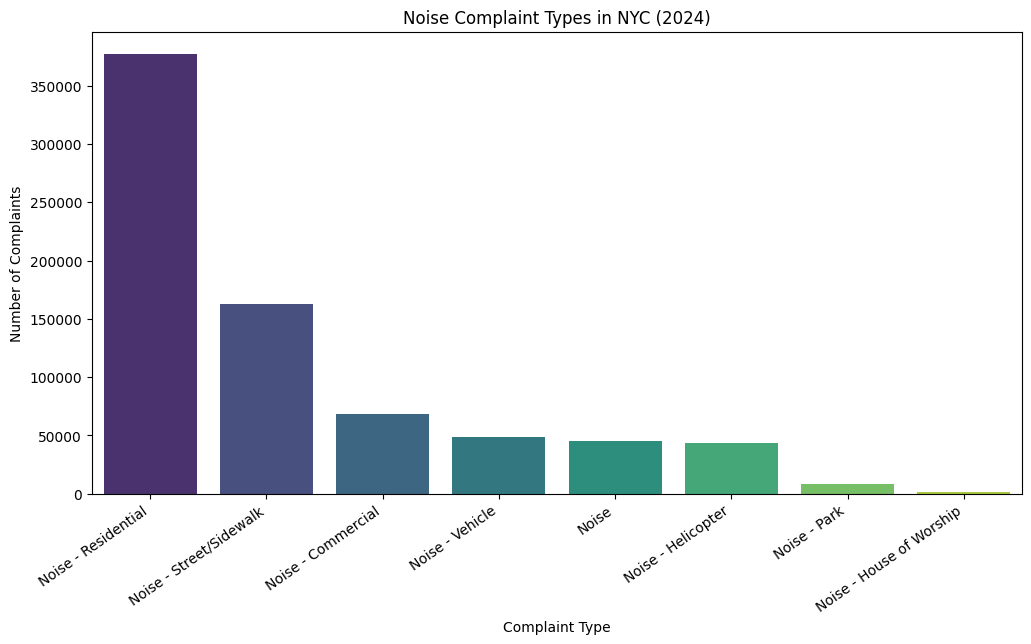

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values, palette="viridis")
plt.title("Noise Complaint Types in NYC (2024)")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")  
plt.xticks(rotation=35, ha='right')
plt.show()

In [41]:
filter = df[df["Complaint Type"].isin(["Noise - Residential", "Noise - Street/Sidewalk","Noise - Commercial"])]
filter["Descriptor"].unique()

left_out = df[~df["Complaint Type"].isin(["Noise - Residential", "Noise - Street/Sidewalk", "Noise - Vehicle", "Noise - Commercial"])]
len(left_out)

99057

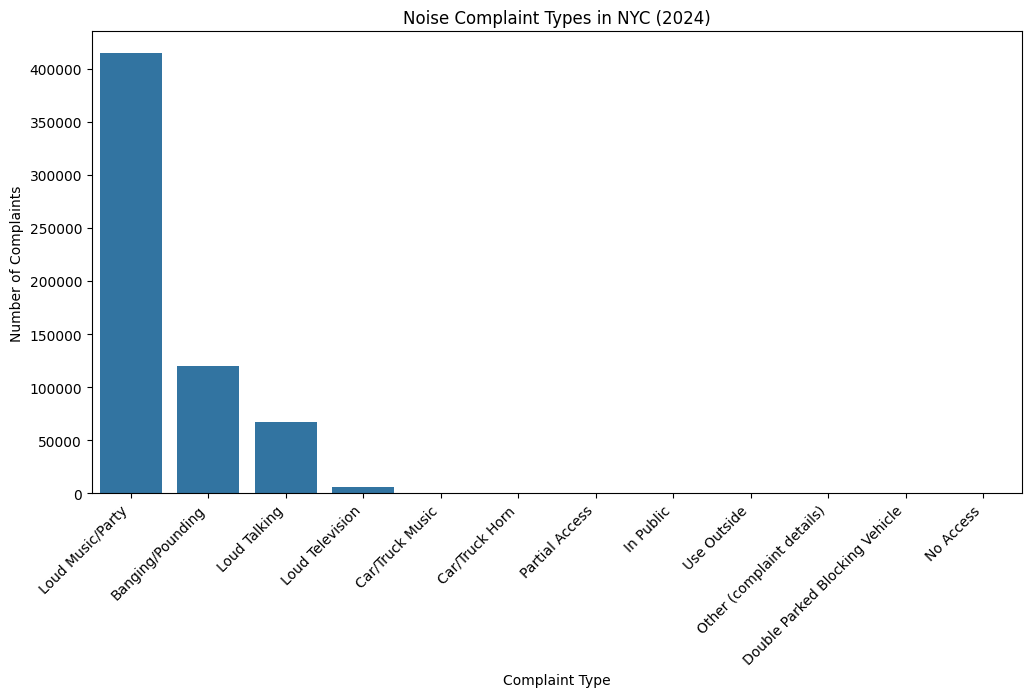

In [42]:
complaint_counts = filter["Descriptor"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)
plt.title("Noise Complaint Types in NYC (2024)")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")  
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_4874/4075684991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['Created Date'] = pd.to_datetime(filter['Created Date'])
/tmp/ipykernel_4874/4075684991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['Month'] = filter['Created Date'].dt.month


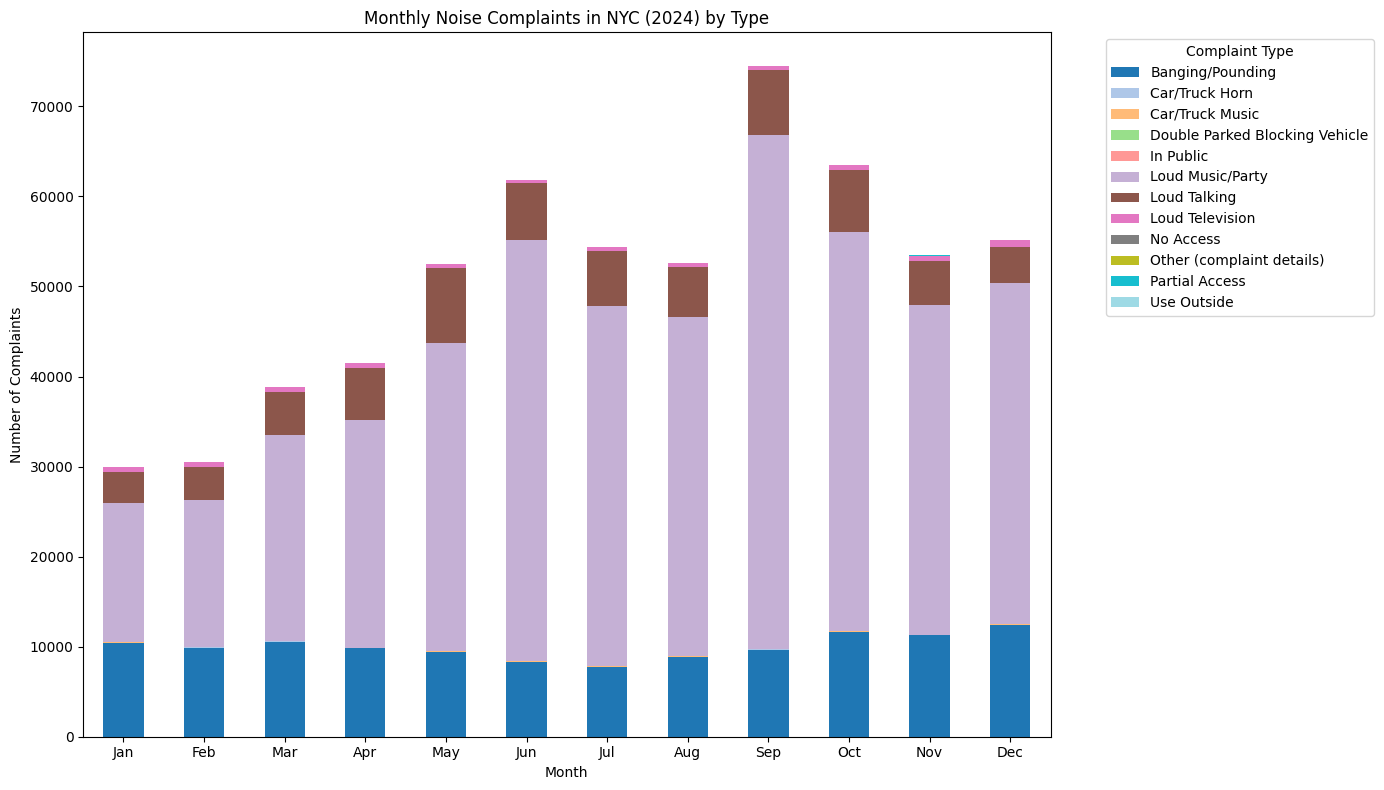

In [45]:
filter['Created Date'] = pd.to_datetime(filter['Created Date'])
filter['Month'] = filter['Created Date'].dt.month

monthly_counts = filter.groupby(['Month', 'Descriptor']).size().unstack(fill_value=0)

plt.figure(figsize=(14,8))

monthly_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title("Monthly Noise Complaints in NYC (2024) by Type")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()